In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
from time import sleep
import re



# Text Exploration - Spacy


In [2]:
import spacy


#nlp = spacy.load('en_core_web_lg')
nlp = spacy.load('en')

In [3]:
file_in = open("articles.txt","r")
corpus = file_in.read()
file_in.close()

In [4]:
%%time
parsed_corpus= nlp(corpus)

CPU times: user 36.7 s, sys: 781 ms, total: 37.5 s
Wall time: 37.9 s


In [5]:
limit = 50
for num, sentence in enumerate(parsed_corpus.sents):
    print('Sentence {}:'.format(num + 1))
    print(sentence)
    print('')
    if num == limit:
        break


Sentence 1:
     Abstract Purpose of Study: The authors determined short-term effects of a home environmental intervention on self-efficacy and upset in caregivers and daily function of dementia patients.

Sentence 2:
They also determined if treatment effect varied by caregiver gender, race, and relationship to patient.

Sentence 3:
Design and Methods: Families (N = 171) of dementia patients were randomized to intervention or usual care control group.

Sentence 4:
The intervention involved 5 90-min home visits by occupational therapists who provided education and physical and social environmental modifi-cations.

Sentence 5:
Results: Compared with controls, intervention caregivers reported fewer declines in patients' instrumental activities of daily living (p = .030) and less decline in self-care and fewer behavior problems in patients at 3 months post-test.

Sentence 6:
Also, intervention spouses reported reduced upset (p = .049), women reported enhanced self-efficacy in managing beha

## POS

In [6]:
token_text = [token.orth_ for token in parsed_corpus]
token_pos = [token.pos_ for token in parsed_corpus]
pd.DataFrame(list(zip(token_text, token_pos)),
    columns=['token_text', 'part_of_speech'])


,token_text,part_of_speech
0,,SPACE
1,Abstract,PROPN
2,Purpose,PROPN
3,of,ADP
4,Study,PROPN
5,:,PUNCT
6,The,DET
7,authors,NOUN
8,determined,VERB
9,short,ADJ


## Named-entity recognition (NER) 

In [7]:
for num, entity in enumerate(parsed_corpus.ents):
    print('Entity {}:'.format(num + 1), entity, '-', entity.label_)
    print('')
    if num == limit:
        break

Entity 1:      Abstract Purpose of Study - ORG

Entity 2: 171 - CARDINAL

Entity 3: 5 - CARDINAL

Entity 4: daily - DATE

Entity 5: at 3 months - DATE

Entity 6: IADL - ORG

Entity 7:  Home - ORG

Entity 8: Laurence G. Branch - PERSON

Entity 9: Schulz - PERSON

Entity 10: Burgio - PERSON

Entity 11: 1996 - DATE

Entity 12: Biegel - PERSON

Entity 13: Schulz - PERSON

Entity 14: 1999 - DATE

Entity 15: Cox 1998 - DATE

Entity 16: African - NORP

Entity 17: American - NORP

Entity 18: Zarit - GPE

Entity 19: Stephens - GPE

Entity 20: Townsend - GPE

Entity 21: Greene - PERSON

Entity 22: Leitsch 1999 - DATE

Entity 23: daily - DATE

Entity 24: Lawton - PERSON

Entity 25: Nahemow 1973 - DATE

Entity 26: e.g. - LAW

Entity 27: Schulz - PERSON

Entity 28: Heckhausen 1999 - DATE

Entity 29: Pynoos - PERSON

Entity 30: Ohta - PERSON

Entity 31: 1991 - DATE

Entity 32: 12 - CARDINAL

Entity 33: 66% of - PERCENT

Entity 34: 89% remained - PERCENT

Entity 35: Gitlin - PERSON

Entity 36: Corcor

## Lemma

In [8]:
token_lemma = [token.lemma_ for token in parsed_corpus]
token_shape = [token.shape_ for token in parsed_corpus]

pd.DataFrame(list(zip(token_text, token_lemma, token_shape)),
             columns=['token_text', 'token_lemma', 'token_shape'])

,token_text,token_lemma,token_shape
0,,,
1,Abstract,abstract,Xxxxx
2,Purpose,purpose,Xxxxx
3,of,of,xx
4,Study,study,Xxxxx
5,:,:,:
6,The,the,Xxx
7,authors,author,xxxx
8,determined,determine,xxxx
9,short,short,xxxx


## Entity Type, IOB

In [9]:
token_entity_type = [token.ent_type_ for token in parsed_corpus]
token_entity_iob = [token.ent_iob_ for token in parsed_corpus]

pd.DataFrame(list(zip(token_text, token_entity_type, token_entity_iob)),
             columns=['token_text', 'entity_type', 'inside_outside_begin'])

,token_text,entity_type,inside_outside_begin
0,,ORG,B
1,Abstract,ORG,I
2,Purpose,ORG,I
3,of,ORG,I
4,Study,ORG,I
5,:,,O
6,The,,O
7,authors,,O
8,determined,,O
9,short,,O


## Misc Attribution

In [10]:
token_attributes = [(token.orth_,
                     token.prob,
                     token.is_stop,
                     token.is_punct,
                     token.is_space,
                     token.like_num,
                     token.is_oov)
                    for token in parsed_corpus]

df = pd.DataFrame(token_attributes,
                  columns=['text',
                           'log_probability',
                           'stop?',
                           'punctuation?',
                           'whitespace?',
                           'number?',
                           'out of vocab.?'])

df.loc[:, 'stop?':'out of vocab.?'] = (df.loc[:, 'stop?':'out of vocab.?']
                                       .applymap(lambda x: u'Yes' if x else u''))
                                               
df

,text,log_probability,stop?,punctuation?,whitespace?,number?,out of vocab.?
0,,-11.804298,,,Yes,,
1,Abstract,-19.579313,,,,,
2,Purpose,-19.579313,,,,,
3,of,-4.128464,Yes,,,,
4,Study,-19.579313,,,,,
5,:,-6.052439,,Yes,,,
6,The,-5.774222,Yes,,,,
7,authors,-11.414688,,,,,
8,determined,-10.898046,,,,,
9,short,-8.915989,,,,,


# Prep for Topic Modeling - Gensim

In [11]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
import os
import codecs
import itertools as it

In [12]:
def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """
    
    return token.is_punct or token.is_space

def line_article(filename):
    """
    generator function to read in articles from the file
    and un-escape the original line breaks in the text
    """
    
    with codecs.open(filename, encoding='utf_8') as f:
        for article in f:
            yield article.replace('\\n', '\n')
            
def lemmatized_sentence_corpus(filename):
    """
    generator function to use spaCy to parse articles,
    lemmatize the text, and yield sentences
    """
    
    for parsed_article in nlp.pipe(line_article(filename),
                                  batch_size=10000, n_threads=3):
        
        for sent in parsed_article.sents:
            yield u' '.join([token.lemma_ for token in sent
                             if not punct_space(token)])

In [13]:
data_directory = 'staging'
unigram_sentences_filepath = os.path.join(data_directory,'unigram_sentences_all.txt')

In [14]:
%%time
article_txt_filepath = 'articles.txt'
# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if True:

    with codecs.open(unigram_sentences_filepath, 'w', encoding='utf_8') as f:
        for sentence in lemmatized_sentence_corpus(article_txt_filepath):
            f.write(sentence + '\n')
    

CPU times: user 37.3 s, sys: 1.62 s, total: 38.9 s
Wall time: 41.2 s


In [15]:
unigram_sentences = LineSentence(unigram_sentences_filepath)


In [16]:
for unigram_sentence in it.islice(unigram_sentences,230,240):
    print(u' '.join(unigram_sentence))
    #print(unigram_sentence)
    print(u'')

caregiver may need more time to practice and use environmental strategy before beneficial outcome be measurable

the 3-month post test may have be too close to the intervention for -PRON- to adequately evaluate treatment effect

a few caregiver intervention study have show a delayed intervention effect such that caregiver report reduce burden and less depression but only over an extended period of time mittelman et al

1995

study on environmental intervention with other population have also report a delayed positive effect of up to a year mann ottenbacher fraas tomita and granger 1999

future research should consider evaluate the impact of home environmental strategy over a long time period

third -PRON- may be that an environmental approach for caregiver require a high dose and level of intensity than that test in this study

case presentation and anecdotal comment by the interventionist support this point

interventionist report that some caregiver appear to need more time than the 

In [17]:
bigram_model_filepath = os.path.join(data_directory,'bigram_model_all')

In [18]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if True:

    bigram_model = Phrases(unigram_sentences)

    bigram_model.save(bigram_model_filepath)
    
# load the finished model from disk
bigram_model = Phrases.load(bigram_model_filepath)

CPU times: user 1.86 s, sys: 88 ms, total: 1.95 s
Wall time: 2.04 s


In [19]:
bigram_sentences_filepath = os.path.join(data_directory,'bigram_sentences_all.txt')

In [20]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if True:

    with codecs.open(bigram_sentences_filepath, 'w', encoding='utf_8') as f:
        
        for unigram_sentence in unigram_sentences:
            
            bigram_sentence = u' '.join(bigram_model[unigram_sentence])
            
            f.write(bigram_sentence + '\n')

CPU times: user 3.02 s, sys: 23.5 ms, total: 3.04 s
Wall time: 3.06 s


In [21]:
bigram_sentences = LineSentence(bigram_sentences_filepath)

In [22]:
for bigram_sentence in it.islice(bigram_sentences, 230, 240):
    print(u' '.join(bigram_sentence))
    print(u'')

caregiver may need more time to practice and use environmental_strategy before beneficial outcome be measurable

the 3-month post_test may have be too close to the intervention for -PRON- to adequately evaluate treatment effect

a few caregiver intervention study have show a delayed intervention effect such that caregiver report reduce burden and less depression but only over an extended period of time mittelman et_al

1995

study on environmental intervention with other population have also report a delayed positive effect of up to a year mann ottenbacher fraas tomita and granger 1999

future_research should_consider evaluate the impact of home environmental_strategy over a long time period

third -PRON- may be that an environmental approach for caregiver require a high dose and level of intensity than that test in this_study

case presentation and anecdotal comment by the interventionist support this point

interventionist report that some caregiver appear to need more time than the 

In [23]:
trigram_model_filepath = os.path.join(data_directory,'trigram_model_all')

In [24]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if True:

    trigram_model = Phrases(bigram_sentences)

    trigram_model.save(trigram_model_filepath)
    
# load the finished model from disk
trigram_model = Phrases.load(trigram_model_filepath)

CPU times: user 1.7 s, sys: 88.7 ms, total: 1.79 s
Wall time: 1.8 s


In [25]:
trigram_sentences_filepath = os.path.join(data_directory,'trigram_sentences_all.txt')

In [26]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if True:

    with codecs.open(trigram_sentences_filepath, 'w', encoding='utf_8') as f:
        
        for bigram_sentence in bigram_sentences:
            
            trigram_sentence = u' '.join(trigram_model[bigram_sentence])
            
            f.write(trigram_sentence + '\n')

CPU times: user 2.81 s, sys: 12 ms, total: 2.82 s
Wall time: 2.83 s


In [27]:
trigram_sentences = LineSentence(trigram_sentences_filepath)

In [28]:
for trigram_sentence in it.islice(trigram_sentences, 230, 240):
    print(u' '.join(trigram_sentence))
    print(u'')

caregiver may need more time to practice and use environmental_strategy before beneficial outcome be measurable

the 3-month post_test may have be too close to the intervention for -PRON- to adequately evaluate treatment_effect

a few caregiver intervention study have show a delayed intervention effect such that caregiver report reduce burden and less depression but only over an extended period of time mittelman et_al

1995

study on environmental_intervention with other population have also report a delayed positive effect of up to a year mann ottenbacher fraas tomita and granger 1999

future_research should_consider evaluate the impact of home environmental_strategy over a long time_period

third -PRON- may be that an environmental approach for caregiver require a high dose and level of intensity than that test in this_study

case presentation and anecdotal comment by the interventionist support this point

interventionist report that some caregiver appear_to need more time than the 

In [29]:
trigram_articles_filepath = os.path.join(data_directory,'trigram_transformed_articles_all.txt')

In [30]:
#from spacy.lang.en import STOP_WORDS
#print(STOP_WORDS)

STOP_WORDS = nlp.Defaults.stop_words
#nlp.Defaults.stop_words

In [31]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if True:

    with codecs.open(trigram_articles_filepath, 'w', encoding='utf_8') as f:
        
        for parsed_article in nlp.pipe(line_article(article_txt_filepath),
                                      batch_size=10000, n_threads=3):
            
            # lemmatize the text, removing punctuation and whitespace
            unigram_article = [token.lemma_ for token in parsed_article
                              if not punct_space(token)]
            
            # apply the first-order and second-order phrase models
            bigram_article = bigram_model[unigram_article]
            trigram_article = trigram_model[bigram_article]
            
            # remove any remaining stopwords
            trigram_article = [term for term in trigram_article
                              if term not in STOP_WORDS ]
            
            # write the transformed article as a line in the new file
            trigram_article = u' '.join(trigram_article)
            f.write(trigram_article + '\n')

CPU times: user 41.4 s, sys: 1.51 s, total: 42.9 s
Wall time: 44 s


In [32]:
print(u'Original:' + u'\n')

for article in it.islice(line_article(article_txt_filepath), 1):
    print(article)

print(u'----' + u'\n')
print(u'Transformed:' + u'\n')

with codecs.open(trigram_articles_filepath, encoding='utf_8') as f:
    for article in it.islice(f, 1):
        print(article)

Original:

     Abstract Purpose of Study: The authors determined short-term effects of a home environmental intervention on self-efficacy and upset in caregivers and daily function of dementia patients. They also determined if treatment effect varied by caregiver gender, race, and relationship to patient. Design and Methods: Families (N = 171) of dementia patients were randomized to intervention or usual care control group. The intervention involved 5 90-min home visits by occupational therapists who provided education and physical and social environmental modifi-cations. Results: Compared with controls, intervention caregivers reported fewer declines in patients' instrumental activities of daily living (p = .030) and less decline in self-care and fewer behavior problems in patients at 3 months post-test. Also, intervention spouses reported reduced upset (p = .049), women reported enhanced self-efficacy in managing behaviors (p = .038), and women (p = .049) and minorities (p = .037) r

In [33]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim
import warnings
import pickle

In [34]:
trigram_dictionary_filepath = os.path.join(data_directory,'trigram_dict_all.dict')


In [35]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to learn the dictionary yourself.
if True:

    trigram_articles = LineSentence(trigram_articles_filepath)

    # learn the dictionary by iterating over all of the articles
    trigram_dictionary = Dictionary(trigram_articles)
       
    # filter tokens that are very rare or too common from
    # the dictionary (filter_extremes) and reassign integer ids (compactify)
    #trigram_dictionary.filter_extremes(no_below=10, no_above=0.4)
    #trigram_dictionary.compactify()
    
    # THIS WORKS
    #trigram_dictionary.filter_extremes(keep_n=25)
    #trigram_dictionary.compactify()
    trigram_dictionary.filter_extremes(no_above=0.9)

    trigram_dictionary.save(trigram_dictionary_filepath)
    
# load the finished dictionary from disk
trigram_dictionary = Dictionary.load(trigram_dictionary_filepath)
print(trigram_dictionary) 
    

Dictionary(4027 unique tokens: ['$', "'s_own", '.05', '.73', '.83']...)
CPU times: user 353 ms, sys: 10.9 ms, total: 364 ms
Wall time: 364 ms


In [36]:

trigram_bow_filepath = os.path.join(data_directory,'trigram_bow_corpus_all.mm')

In [37]:
def trigram_bow_generator(filepath):
    """
    generator function to read articles from a file
    and yield a bag-of-words representation
    """
    
    for article in LineSentence(filepath):
        yield trigram_dictionary.doc2bow(article)

In [38]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to build the bag-of-words corpus yourself.
if True:

    # generate bag-of-words representations for
    # all articles and save them as a matrix
    MmCorpus.serialize(trigram_bow_filepath,
                       trigram_bow_generator(trigram_articles_filepath))
    
# load the finished bag-of-words corpus from disk
trigram_bow_corpus = MmCorpus(trigram_bow_filepath)


CPU times: user 298 ms, sys: 11.8 ms, total: 310 ms
Wall time: 311 ms


## TOPIC MODELING


In [39]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

lsimodel = LsiModel(corpus=trigram_bow_corpus, num_topics=10, id2word=trigram_dictionary)

In [40]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  '0.258*"care" + 0.241*"resident" + 0.240*"caregiver" + 0.161*"group" + 0.156*"nursing_home" + 0.122*"age" + 0.121*"measure" + 0.115*"analysis" + 0.114*"datum" + 0.114*"service"'),
 (1,
  '-0.509*"caregiver" + 0.466*"resident" + 0.267*"care" + 0.233*"nursing_home" + 0.217*"facility" + 0.185*"quality" + 0.125*"staff" + -0.097*"sample" + 0.094*"long_term_care" + -0.090*"depression"'),
 (2,
  '0.588*"caregiver" + 0.338*"resident" + -0.219*"age" + 0.185*"intervention" + 0.147*"care" + 0.141*"nursing_home" + -0.136*"old" + -0.114*"child" + -0.103*"respondent" + 0.097*"staff"'),
 (3,
  '-0.307*"long_term_care" + 0.296*"resident" + -0.235*"service" + -0.221*"care" + -0.211*"caregiver" + 0.196*"item" + -0.175*"ltc" + -0.164*"story" + -0.142*"issue" + 0.141*"measure"'),
 (4,
  '-0.408*"child" + -0.404*"parent" + 0.287*"item" + 0.194*"subject" + -0.173*"retirement" + -0.158*"contact" + 0.124*"score" + -0.112*"visit" + -0.108*"care" + -0.106*"contact_with"')]

In [41]:
hdpmodel = HdpModel(corpus=trigram_bow_corpus, id2word=trigram_dictionary)

In [42]:
hdpmodel.show_topics()

[(0,
  '0.009*group + 0.008*care + 0.007*nursing_home + 0.007*resident + 0.005*research + 0.005*caregiver + 0.005*item + 0.005*service + 0.005*facility + 0.005*information + 0.004*quality + 0.004*subject + 0.004*need + 0.004*datum + 0.003*factor + 0.003*pain + 0.003*measure + 0.003*state + 0.003*staff + 0.003*outcome'),
 (1,
  '0.011*long_term_care + 0.009*care + 0.008*nursing_home + 0.008*innovation + 0.006*facility + 0.006*story + 0.006*resident + 0.006*patient + 0.006*analysis + 0.005*service + 0.005*datum + 0.004*1998 + 0.004*coverage + 0.004*issue + 0.004*change + 0.003*decision + 0.003*policy + 0.003*need + 0.003*do_not + 0.003*increase'),
 (2,
  '0.014*caregiver + 0.007*age + 0.006*relative + 0.005*factor + 0.005*resident + 0.005*support + 0.005*model + 0.005*life + 0.004*family + 0.004*measure + 0.004*change + 0.004*nursing_home + 0.004*significant + 0.004*parent + 0.004*experience + 0.004*analysis + 0.004*year + 0.003*increase + 0.003*group + 0.003*cohort'),
 (3,
  '0.012*care

In [43]:
ldamodel = LdaModel(corpus=trigram_bow_corpus, num_topics=10, id2word=trigram_dictionary)

In [44]:
ldamodel.show_topics()

[(0,
  '0.008*"group" + 0.006*"caregiver" + 0.006*"age" + 0.005*"resident" + 0.005*"care" + 0.005*"research" + 0.004*"participant" + 0.004*"analysis" + 0.004*"measure" + 0.004*"datum"'),
 (1,
  '0.007*"resident" + 0.007*"care" + 0.005*"group" + 0.005*"age" + 0.005*"analysis" + 0.005*"need" + 0.004*"state" + 0.004*"datum" + 0.004*"facility" + 0.004*"quality"'),
 (2,
  '0.012*"caregiver" + 0.011*"care" + 0.006*"resident" + 0.005*"nursing_home" + 0.005*"analysis" + 0.004*"group" + 0.004*"datum" + 0.004*"need" + 0.004*"year" + 0.004*"level"'),
 (3,
  '0.011*"care" + 0.008*"caregiver" + 0.007*"resident" + 0.005*"need" + 0.005*"datum" + 0.004*"measure" + 0.004*"intervention" + 0.004*"time" + 0.004*"nursing_home" + 0.004*"service"'),
 (4,
  '0.010*"resident" + 0.008*"care" + 0.008*"group" + 0.006*"caregiver" + 0.006*"nursing_home" + 0.005*"family" + 0.005*"measure" + 0.004*"quality" + 0.004*"facility" + 0.004*"life"'),
 (5,
  '0.012*"care" + 0.009*"resident" + 0.005*"item" + 0.004*"caregiver"

In [45]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, trigram_bow_corpus, trigram_dictionary)

/Users/bcbarsness/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      14.572610        1       1  0.005341 -0.007542
5      13.040705        1       2  0.003579  0.005716
6      13.014960        1       3 -0.011263 -0.001674
9      11.788996        1       4 -0.006617  0.006073
4      11.709741        1       5  0.006328  0.001572
7      11.697802        1       6  0.004339  0.006710
0       8.927112        1       7 -0.001118 -0.006209
3       7.198975        1       8  0.005716 -0.004057
8       6.081405        1       9 -0.006789 -0.002561
1       1.967687        1      10  0.000485  0.001973, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
1253  Default  1136.000000      resident  1136.000000  30.0000  30.0000
187   Default  1420.000000          care  1420.000000  29.0000  29.0000
112   Default   825.000000           age   825.000000  28.0000  28.0000
190   Default  1069.000000     caregiver  1069.000000  27.0000  27.0000
445   Default   919.000000         group   919.000000  26.0000  26.0000
1278  Default   573.000000         state   573.000000  25.0000  25.0000
1237  Default   488.000000       quality   488.000000  24.0000  24.0000
1111  Default   466.000000      facility   466.000000  23.0000  23.0000
612   Default   679.000000          need   679.000000  22.0000  22.0000
1210  Default   492.000000           old   492.000000  21.0000  21.0000
36    Default   421.000000          1998   421.000000  20.0000  20.0000
1152  Default   501.000000      increase   501.000000  19.0000  19.0000
125   Default   694.000000      analysis   694.000000  18.0000  18.0000
785   Default   656.000000        sample   656.000000  17.0000  17.0000
280   Default   711.000000         datum   711.000000  16.0000  16.0000
518   Default   378.000000  intervention   378.000000  15.0000  15.0000
649   Default   527.000000   participant   527.000000  14.0000  14.0000
1209  Default   701.000000  nursing_home   701.000000  13.0000  13.0000
769   Default   604.000000      research   604.000000  12.0000  12.0000
1988  Default   271.000000        parent   271.000000  11.0000  11.0000
936   Default   442.000000      variable   442.000000  10.0000  10.0000
398   Default   478.000000        family   478.000000   9.0000   9.0000
966   Default   478.000000          year   478.000000   8.0000   8.0000
806   Default   719.000000       service   719.000000   7.0000   7.0000
330   Default   450.000000        do_not   450.000000   6.0000   6.0000
3264  Default   158.000000        ageism   158.000000   5.0000   5.0000
497   Default   487.000000    individual   487.000000   4.0000   4.0000
791   Default   454.000000         score   454.000000   3.0000   3.0000
653   Default   408.000000       patient   408.000000   2.0000   2.0000
396   Default   536.000000        factor   536.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
936   Topic10    11.055089      variable   442.187408   0.2395  -5.7751
1253  Topic10    24.346025      resident  1136.974976   0.0846  -4.9857
1210  Topic10    11.988944           old   492.190552   0.2134  -5.6940
156   Topic10     6.072276     available   223.148041   0.3242  -6.3743
144   Topic10     7.768024    assessment   302.678253   0.2657  -6.1280
112   Topic10    17.268215           age   825.235046   0.0615  -5.3292
280   Topic10    15.199298         datum   711.534973   0.0821  -5.4568
445   Topic10    18.283810         group   919.659851   0.0103  -5.2720
649   Topic10    11.385199   participant   527.575867   0.0923  -5.7457
187   Topic10    23.254585          care  1420.770386  -0.1841  -5.0315
2296  Topic10     8.424849         staff   356.745209   0.1825  -6.0468
368   Topic10    10.186322         et_al   465.488678   0.1063  -5.8570
653   Topic10     9.229783       patient   408.213135   0.1390  -5.95

In [46]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [47]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=trigram_articles, dictionary=trigram_dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=trigram_articles, dictionary=trigram_dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=trigram_articles, dictionary=trigram_dictionary, window_size=10).get_coherence()

In [48]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

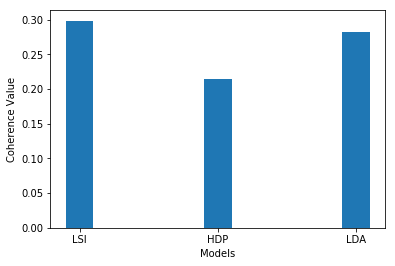

In [49]:
import matplotlib.pyplot as plt
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

In [50]:
lda_model_filepath = os.path.join(data_directory, 'lda_model_all')

In [51]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to train the LDA model yourself.
if True:

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        # workers => sets the parallelism, and should be
        # set to your number of physical cores minus one
        lda = LdaMulticore(trigram_bow_corpus,
                           num_topics=5,
                           id2word=trigram_dictionary,
                           workers=3)
    
    lda.save(lda_model_filepath)
    
# load the finished LDA model from disk
lda = LdaMulticore.load(lda_model_filepath)

CPU times: user 853 ms, sys: 101 ms, total: 954 ms
Wall time: 1.01 s


In [52]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda.show_topic(topic_number, topn=25):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

In [53]:
explore_topic(topic_number=2)

term                 frequency

resident             0.010
care                 0.010
caregiver            0.007
nursing_home         0.005
group                0.004
datum                0.004
sample               0.004
state                0.004
analysis             0.004
number               0.004
service              0.004
level                0.004
long_term_care       0.004
need                 0.003
research             0.003
1997                 0.003
intervention         0.003
individual           0.003
measure              0.003
do_not               0.003
variable             0.003
activity             0.003
1996                 0.003
respondent           0.003
quality              0.003
